In [14]:
import sqlalchemy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

In [2]:
engine: sqlalchemy.engine.base.Engine = sqlalchemy.create_engine("postgresql+psycopg2://postgres@db/postgres")

In [3]:
stats_query: str = """
                   select
                   count(*) as "records",
                   avg(Steps::int) as "avg steps"
                   from
                   collatz
                   """

with engine.connect() as conn:
    stats = conn.execute(sqlalchemy.text(stats_query))
    print(stats.all())

[(8095150, Decimal('153.9951475883708146'))]


In [4]:
all_query: str = """
                 select
                 Number::int,
                 Steps::int
                 from
                 collatz
                 """

with engine.connect() as conn:
    all_results = conn.execute(sqlalchemy.text(all_query))
    
collatz_df: pd.DataFrame = pd.DataFrame(all_results.all())
collatz_df.head()

,number,steps
0,1,1
1,2,2
2,3,8
3,4,3
4,5,6


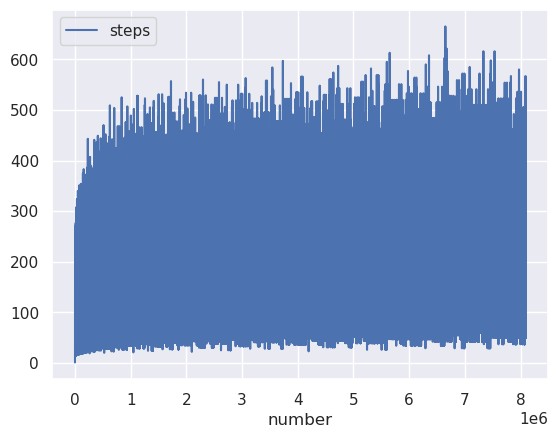

In [33]:
collatz_df.plot(x="number", y="steps")
plt.show()

In [34]:
collatz_df["log10_number"] = np.log10(collatz_df["number"])

In [37]:
sliced_collatz = collatz_df.iloc[:]

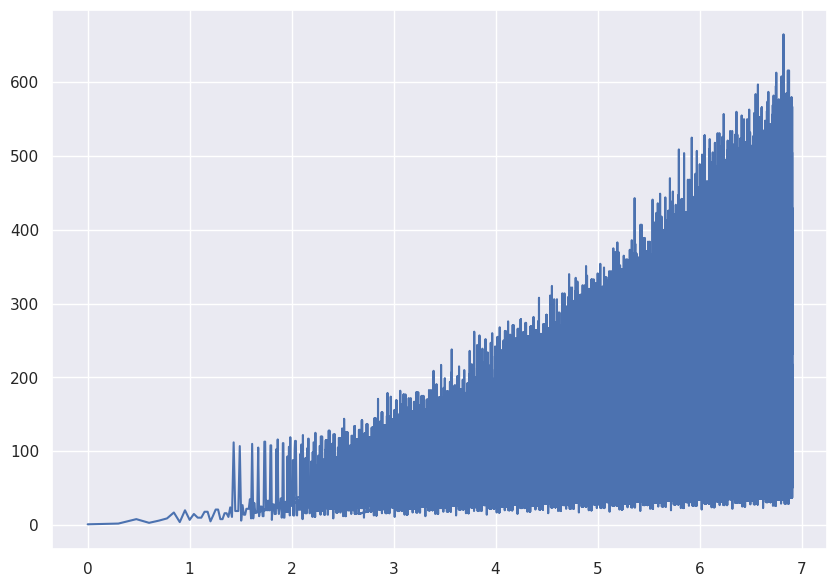

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))

ax.plot(sliced_collatz["log10_number"], sliced_collatz["steps"])

plt.show()

In [ ]:
# FFT of this?